In [56]:
from qs_mps.sparse_hamiltonians_and_operators import sparse_pauli_x, sparse_pauli_z
from scipy.sparse import csr_array
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
import numpy as np

In [60]:
L = 8
H_zxz = csr_array((2**L, 2**L), dtype=complex)
for i in range(L-2):
    H_zxz -= sparse_pauli_z(n=i, L=L) @ sparse_pauli_x(n=i+1, L=L) @ sparse_pauli_z(n=i+2, L=L)

In [62]:
e, v = np.linalg.eig(H_zxz.toarray())
print(e)

[ 4.00000000e+00-2.77419381e-32j -4.00000000e+00-2.77419381e-32j
  6.00000000e+00-9.63819038e-32j -6.00000000e+00-7.65666052e-32j
  6.00000000e+00+1.69722576e-33j -6.00000000e+00-8.80234150e-32j
  4.00000000e+00+1.47188012e-31j -4.00000000e+00+1.30125531e-31j
  4.00000000e+00+5.72665378e-32j -4.00000000e+00-3.53417603e-32j
  4.00000000e+00+8.91052055e-32j -4.00000000e+00+1.72227713e-31j
  4.00000000e+00-2.26071409e-33j -4.00000000e+00+1.24135602e-31j
  4.00000000e+00+1.50623026e-31j -4.00000000e+00+1.04034755e-31j
  4.00000000e+00-3.43631187e-30j -4.00000000e+00+6.09229570e-30j
  2.00000000e+00+2.01948392e-27j  2.00000000e+00+2.01948392e-28j
  2.00000000e+00-8.09371289e-28j -2.00000000e+00+6.86622309e-27j
 -2.00000000e+00+1.26534152e-26j  2.00000000e+00+0.00000000e+00j
  2.00000000e+00+1.29246971e-26j -2.00000000e+00-1.75328547e-26j
  2.00000000e+00-2.19108582e-27j  2.00000000e+00+6.94302785e-26j
 -2.00000000e+00+3.21428297e-40j -2.00000000e+00-1.29246971e-26j
 -2.00000000e+00-1.550963

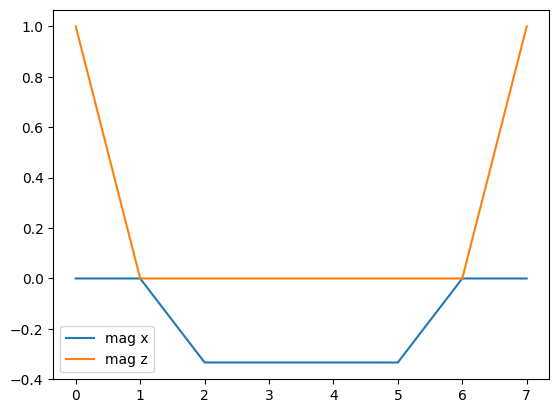

In [63]:
psi = v[:,0]
mag_x = []
mag_z = []
for i in range(L):
    mag = (psi.conjugate() @ (sparse_pauli_x(n=i, L=L)) @ psi).real
    mag_x.append(mag)
    mag = (psi.conjugate() @ (sparse_pauli_z(n=i, L=L)) @ psi).real
    mag_z.append(mag)
plt.plot(mag_x,label="mag x")
plt.plot(mag_z,label="mag z")
plt.legend()
plt.show()

## Add an external field

In [64]:
def cluster(L, lamb):
    H_zxz = csr_array((2**L, 2**L), dtype=complex)
    H_x = csr_array((2**L, 2**L), dtype=complex)
    for i in range(L-2):
        H_zxz += sparse_pauli_z(n=i, L=L) @ sparse_pauli_x(n=i+1, L=L) @ sparse_pauli_z(n=i+2, L=L)
        H_x += sparse_pauli_x(n=i,L=L)
    return H_zxz + lamb*H_x

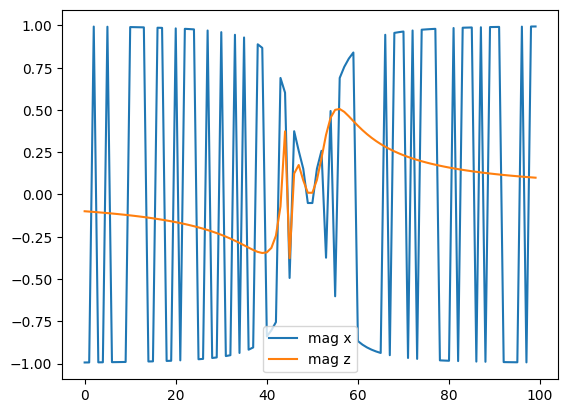

In [71]:
L = 8
mag_x = []
mag_z = []
for lamb in np.linspace(-10,10,100):
    H = cluster(L,lamb)
    e, v = np.linalg.eig(H.toarray())
    psi = v[:,0]
    mag = (psi.conjugate() @ (sparse_pauli_x(n=L//2, L=L)) @ psi).real
    mag_x.append(mag)
    mag = (psi.conjugate() @ (sparse_pauli_z(n=L//2, L=L)) @ psi).real
    mag_z.append(mag)
plt.plot(mag_x,label="mag x")
plt.plot(mag_z,label="mag z")
plt.legend()
plt.show()
